# **STP 598 Final Project Code**


Hibah Usmani (1218793810)  
Shreykumar Savsani (1228071834)  
Arizona State University  
Dr. Shiwei Lan  

## Packages

Import packages necessary for the project.

In [12]:
pip install pandas numpy matplotlib

Note: you may need to restart the kernel to use updated packages.


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, recall_score, precision_score, accuracy_score, f1_score
from sklearn import linear_model
from sklearn.model_selection import RandomizedSearchCV

## Load Data

Load the data from Google Drive. Then, view the first few lines of the data and the names of the columns.

In [16]:
# load csv file as pandas dataframe
df = pd.read_csv("credit-card-data.csv", header = 1)

# rename last column to shorter name 'target'
df.rename(columns = {'default payment next month': 'target'}, inplace = True)

In [17]:
# overview of data
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,target
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [18]:
# column names
df.columns.to_list()

['ID',
 'LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'target']

## Split Data

Next, spliit the data wiht 70% for training and 30% for testing.

In [19]:
# identify X and y from original dataframe
X = df.iloc[:, 1:24]
y = df.iloc[:, -1:]

In [20]:
# split both into a train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30,
                                                    random_state = 73)

In [21]:
# print shape of all datasets
print("Shape of X Train:", X_train.shape)
print("Shape of y Train:", y_train.shape)
print("Shape of X Test:", X_test.shape)
print("Shape of y Test:", y_test.shape)

Shape of X Train: (21000, 23)
Shape of y Train: (21000, 1)
Shape of X Test: (9000, 23)
Shape of y Test: (9000, 1)


## EDA

Next, go through Exploratory Data Analysis Steps before modeling.

First, create dummy variables for the categorical features present in the dataset.

In [22]:
# identify cateogrical features
categorical = ['SEX', 'EDUCATION', 'MARRIAGE']

# one hot encode categorical features
cat_dummies = pd.get_dummies(X_train[categorical].astype(str)).astype(int)

# rename columns according to data description
cat_dummies.rename({'SEX_1': 'SEX_MALE',
                    'SEX_2': 'SEX_FEMALE',
                    'EDUCATION_1': 'EDUCATION_GRAD',
                    'EDUCATION_2': 'EDUCATION_UNI',
                    'EDUCATION_3': 'EDUCATION_HS',
                    'EDUCATION_4': 'EDUCATION_OTHER_4',
                    'EDUCATION_5': 'EDUCATION_OTHER_5',
                    'EDUCATION_6': 'EDUCATION_OTHER_6',
                    'EDUCATION_0': 'EDUCATION_OTHER_0',
                    'MARRIAGE_1': 'MARRIAGE_MARRIED',
                    'MARRIAGE_2': 'MARRIAGE_SINGLE',
                    'MARRIAGE_3': 'MARRIAGE_OTHER_3',
                    'MARRIAGE_0': 'MARRIAGE_OTHER_0'
                  }, axis = 'columns', inplace = True)

# drop one column for each category as reference
cat_dummies.drop(['SEX_FEMALE', 'EDUCATION_HS', 'MARRIAGE_SINGLE'], axis = 1,
                 inplace = True)

# include dummy encoding in X_train and remove original categorical
X_train_eda = pd.concat([X_train.drop(categorical, axis = 1), cat_dummies], axis = 1)

# shape and overview
print(X_train_eda.shape)
X_train_eda.head()

(21000, 30)


,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,SEX_MALE,EDUCATION_OTHER_0,EDUCATION_GRAD,EDUCATION_UNI,EDUCATION_OTHER_4,EDUCATION_OTHER_5,EDUCATION_OTHER_6,MARRIAGE_OTHER_0,MARRIAGE_MARRIED,MARRIAGE_OTHER_3
23848,220000,54,-1,-1,-1,-1,-1,-1,265,4786,...,0,0,0,1,0,0,0,0,1,0
18322,20000,23,0,0,0,0,0,0,19422,17545,...,0,0,1,0,0,0,0,0,0,0
19375,200000,35,0,0,0,0,2,0,104393,108956,...,0,0,0,1,0,0,0,0,0,0
1504,310000,39,0,0,0,0,0,0,7246,6713,...,0,0,0,1,0,0,0,0,1,0
16019,360000,31,-2,-2,-2,-2,-2,-1,3000,2668,...,0,0,0,1,0,0,0,0,0,0


Based on the distributions and the description of the data, an indicator can be created for if a customer has a bill amount of 0 for at least half of the six bills. We think this could be an interesting feature related to if a customer's use of their credit card.

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'target',
       'no_of_zero_bill_3'],
      dtype='object')
New column 'has_zero_bill' created:
Count: no_of_zero_bill_3
0    23887
1     1864
2     1169
3      800
4      763
5      651
6      866
Name: count, dtype: int64
More than 3 bill amount zero records:  2280


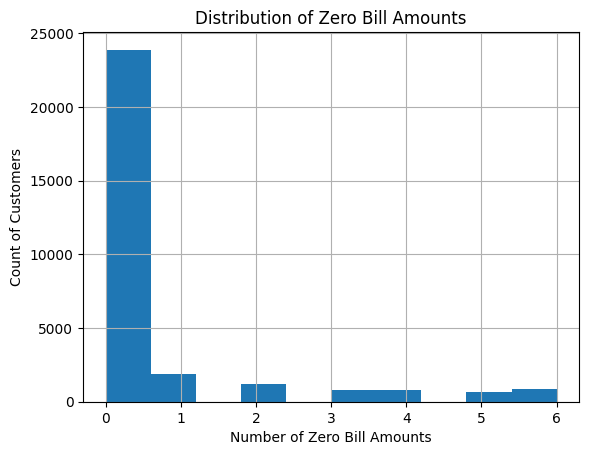

In [23]:
# identify bill columns
bill_columns = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']

# new column for number of zero values across bill amounts
df['no_of_zero_bill_3'] = (df[bill_columns] == 0).sum(axis=1)

# current list of columns
print(df.columns)

# output of new column
print("New column 'has_zero_bill' created:")
print("Count:", df['no_of_zero_bill_3'].value_counts().sort_index())

# number of customers with many zero bill amounts
print("More than 3 bill amount zero records: ", (df['no_of_zero_bill_3'] > 3).sum())

# histogram to visualize results
df['no_of_zero_bill_3'].hist()
plt.title("Distribution of Zero Bill Amounts")
plt.xlabel("Number of Zero Bill Amounts")
plt.ylabel("Count of Customers")
plt.show()

From the above results, it seems like there is not a lot of customers with zero bill amounts. This means that it should not be a concern while modeling, so the indicator will not be included.

Next, view the distributions of all features.

array([[<Axes: title={'center': 'LIMIT_BAL'}>,
        <Axes: title={'center': 'AGE'}>,
        <Axes: title={'center': 'PAY_0'}>,
        <Axes: title={'center': 'PAY_2'}>,
        <Axes: title={'center': 'PAY_3'}>],
       [<Axes: title={'center': 'PAY_4'}>,
        <Axes: title={'center': 'PAY_5'}>,
        <Axes: title={'center': 'PAY_6'}>,
        <Axes: title={'center': 'BILL_AMT1'}>,
        <Axes: title={'center': 'BILL_AMT2'}>],
       [<Axes: title={'center': 'BILL_AMT3'}>,
        <Axes: title={'center': 'BILL_AMT4'}>,
        <Axes: title={'center': 'BILL_AMT5'}>,
        <Axes: title={'center': 'BILL_AMT6'}>,
        <Axes: title={'center': 'PAY_AMT1'}>],
       [<Axes: title={'center': 'PAY_AMT2'}>,
        <Axes: title={'center': 'PAY_AMT3'}>,
        <Axes: title={'center': 'PAY_AMT4'}>,
        <Axes: title={'center': 'PAY_AMT5'}>,
        <Axes: title={'center': 'PAY_AMT6'}>],
       [<Axes: title={'center': 'SEX_MALE'}>,
        <Axes: title={'center': 'EDUCATION_OTH

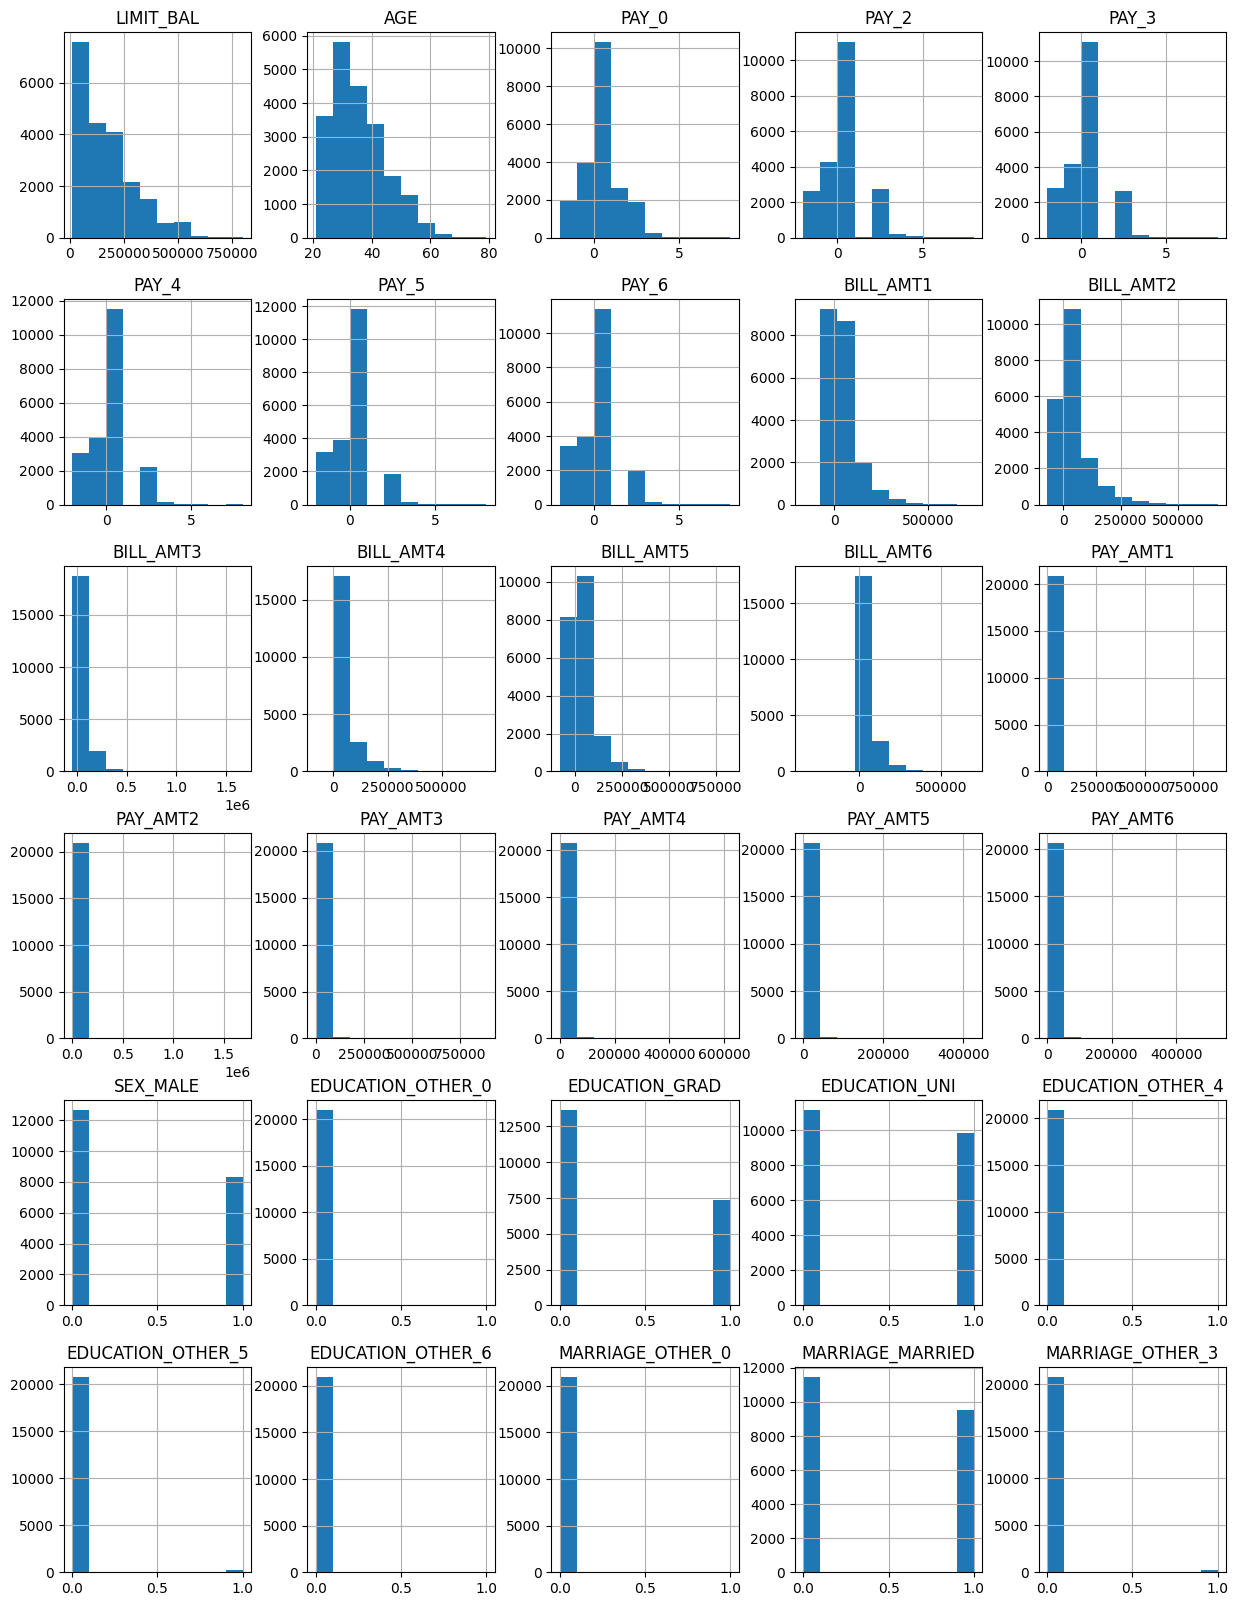

In [24]:
# histograms
X_train_eda.hist(figsize = (15,20))

In [25]:
# numerical descriptions
X_train_eda.describe()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,SEX_MALE,EDUCATION_OTHER_0,EDUCATION_GRAD,EDUCATION_UNI,EDUCATION_OTHER_4,EDUCATION_OTHER_5,EDUCATION_OTHER_6,MARRIAGE_OTHER_0,MARRIAGE_MARRIED,MARRIAGE_OTHER_3
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.00000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,...,21000.000000,21000.000000,21000.000000,21000.000000,21000.00000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000
mean,166687.603810,35.458619,-0.011714,-0.131857,-0.16381,-0.215381,-0.259905,-0.285238,50934.862714,48967.055095,...,0.396857,0.000476,0.349667,0.467810,0.00419,0.009762,0.001857,0.001905,0.453381,0.010667
std,129082.042168,9.222981,1.122123,1.194697,1.19670,1.171531,1.138142,1.154097,72837.650188,70185.627401,...,0.489258,0.021817,0.476876,0.498975,0.06460,0.098321,0.043056,0.043603,0.497834,0.102730
min,10000.000000,21.000000,-2.000000,-2.000000,-2.00000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,3565.750000,3032.500000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,140000.000000,34.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,22431.000000,21435.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,240000.000000,41.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,66774.250000,64049.500000,...,1.000000,0.000000,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000
max,800000.000000,79.000000,8.000000,8.000000,8.00000,8.000000,8.000000,8.000000,746814.000000,671563.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


## Feature Selection

Next, the best features should be selected for the model. This is done using three methods: univariate screening, LASSO, and feature importances.

### Univariate Screening

For univariate screening, a random forest model is created for each individual feature with the target in order to get the area under the curve value. These can then be ranked from high to low.

In [26]:
# initialize list to hold results
auc_data = []

# iteratre through features
for col in X_train_eda.columns:
  # identify the x and y
  x = X_train_eda[col].to_frame()
  y = y_train.values.ravel()

  # fit a random forest
  rf = RandomForestClassifier(random_state = 73)
  rf.fit(x, y)

  # calculate auc score
  auc = roc_auc_score(y, rf.predict_proba(x)[:, 1])

  # add results to list
  auc_data.append({'Feature': col, 'AUC': auc})

In [27]:
# convert list to dataframe and sort from high to low
auc_results = pd.DataFrame(auc_data).sort_values(by = 'AUC', ascending = False).reset_index(drop = True)
auc_results

,Feature,AUC
0,BILL_AMT1,0.975649
1,BILL_AMT2,0.971854
2,BILL_AMT3,0.969418
3,BILL_AMT4,0.964913
4,BILL_AMT5,0.960830
5,BILL_AMT6,0.956175
6,PAY_AMT1,0.814058
7,PAY_AMT2,0.804536
8,PAY_AMT3,0.799212
9,PAY_AMT4,0.784178


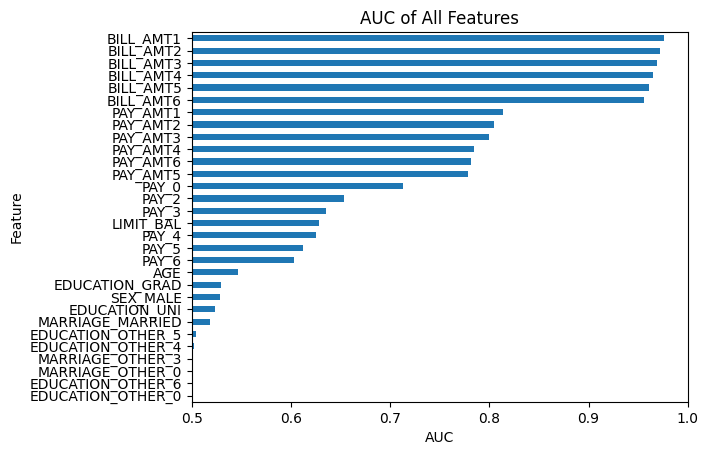

In [28]:
# visualize results using a bar plot
auc_results.sort_values(by = 'AUC',
                        ascending = True).plot(kind = 'barh',
                                               y = 'AUC',
                                               x = 'Feature',
                                               xlim = (0.5, 1.0),
                                               xlabel = 'AUC',
                                               legend = False,
                                               title = 'AUC of All Features'
                                               )
plt.show()

From the univariate screening, it appears that bill and pay amounts are the strongest features individually.

### LASSO Regression

The next feature selection method is LASSO using a five-fold cross validation. This will select the best penalty term which causes some coefficients to shrink to zero. The remaining coefficients correspond to the selected features in LASSO.

In [29]:
# lasso CV method
lasso = LassoCV(cv = 5, random_state = 73).fit(X_train_eda, y_train)

c:\Users\shrey\anaconda3\envs\STP_598\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1714: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [30]:
# best penalty term
lasso.alpha_

64.3535939806477

In [31]:
# coefficients of all features
lasso.coef_

array([-4.93354915e-07,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -1.86753691e-07,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        2.30739963e-08,  5.66754937e-07, -8.92257125e-07, -2.33731912e-07,
       -2.77746693e-07, -4.09856758e-07, -5.92031713e-07, -2.24824783e-08,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00])

In [32]:
# features with non-zero coefficients
lasso_features = list(lasso.feature_names_in_[lasso.coef_ != 0])
lasso_features

['LIMIT_BAL',
 'BILL_AMT1',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

11 of the 30 features had coefficients from LASSO regression while the remaining had coefficients that shrunk to 0. This includes the bill and pay amounts as seen from univariate screening, but now limit balance is included as well.

Using the code from a class demo, a LASSO path can be created to visualize the shrinkage of coefficients based on an increasing penalty term.

Computing regularization path using the LARS ...
.

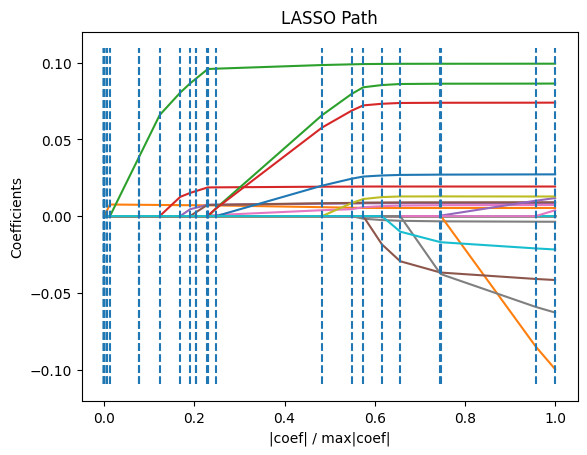

In [33]:
# code from class lecture
X = X_train_eda.astype(float).to_numpy()
y = y_train.to_numpy().ravel()

print("Computing regularization path using the LARS ...")
_, _, coefs = linear_model.lars_path(X, y, method='lasso', verbose=True)

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.show()

### Feature Importances

The last feature selection method was feature importances. This is done by creating a default random forest model with all features and obtaining the impurity-based feature importances. These can then be ranked from high to low.

In [34]:
# random forest with all features
rf = RandomForestClassifier(random_state = 73)
rf.fit(X_train_eda, y_train)

# importance values in dataframe, ranked from high to low
importances = pd.DataFrame({'Feature': rf.feature_names_in_,
                            'Importance': rf.feature_importances_}).sort_values(by = 'Importance', ascending = False)
importances

c:\Users\shrey\anaconda3\envs\STP_598\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,Feature,Importance
2,PAY_0,0.096100
1,AGE,0.065943
0,LIMIT_BAL,0.060499
8,BILL_AMT1,0.059854
9,BILL_AMT2,0.053251
10,BILL_AMT3,0.052125
14,PAY_AMT1,0.051002
13,BILL_AMT6,0.050419
11,BILL_AMT4,0.050256
12,BILL_AMT5,0.049189


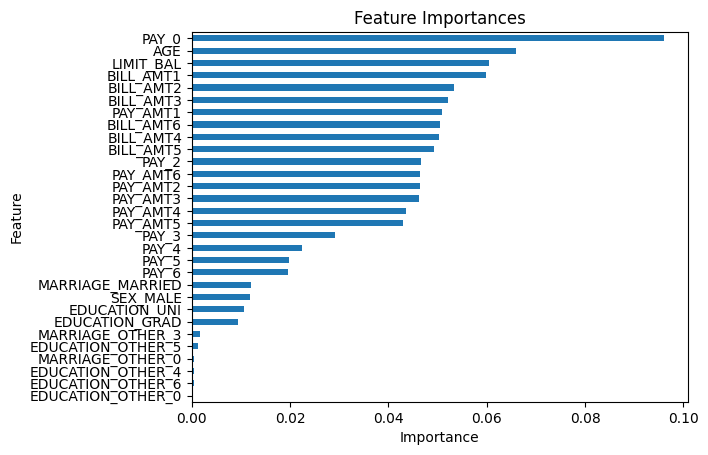

In [35]:
# visualize results in bar plot
importances.sort_values(by = 'Importance',
                        ascending = True).plot(kind = 'barh',
                                               y = 'Importance',
                                               x = 'Feature',
                                               #xlim = (0.5, 1.0),
                                               xlabel = 'Importance',
                                               legend = False,
                                               title = 'Feature Importances'
                                               )
plt.show()

The results of this method are similar to the other two but with the inclusion of age this time. A cutoff of 0.02 for importances would allow for the top 20 of the features to be selected.

The following code selects features based on the results of univariate screening, lasso, and feature importances.

In [36]:
# select top features
selected_features = importances['Feature'][importances['Importance'] > 0.02]

## Model Training

We will compare 2 models for this project. One will include all the features from the dataset while the other will include only those selected from feature selection.

First, a function can be created that calculates the metrics we are interested in.

In [37]:
# calculate metrics based on model, x, and y
def metric_calc(model, X, y):
  # auc, precision, recall, accuracy, f1
  auc = roc_auc_score(y, model.predict_proba(X)[:, 1])
  precision = precision_score(y, model.predict(X))
  recall = recall_score(y, model.predict(X))
  accuracy = accuracy_score(y, model.predict(X))
  f1 = f1_score(y, model.predict(X))

  # return all metrics
  return auc, precision, recall, accuracy, f1

In [38]:
# random forest all features
rf_all = RandomForestClassifier(random_state = 73)
rf_all.fit(X_train_eda, y_train)

# model metrics
print(metric_calc(rf_all, X_train_eda, y_train))

c:\Users\shrey\anaconda3\envs\STP_598\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


(0.9999923511693474, 0.998932536293766, 0.9978673491149499, 0.9992857142857143, 0.9983996585938334)


In [39]:
# random forest: selected features
rf_select = RandomForestClassifier(random_state = 73)
rf_select.fit(X_train_eda[selected_features], y_train)

# model metrics
print(metric_calc(rf_select, X_train_eda[selected_features], y_train))

c:\Users\shrey\anaconda3\envs\STP_598\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


(0.9999322915050688, 0.9976420150053591, 0.9925357219023246, 0.9978095238095238, 0.9950823177250374)


Since the model with the selected features performs just as well as the model with all features, it will be used in order to give a more parsimonious result.

## Parameter Selection

Next, the hyperparameters will be tuned. This is done using randomized search with cross validation to select best parameters that prevent overfitting. Note that this code takes a while to run because of how many combinations are checked.

In [40]:
# current model parameters
rf_all.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 73,
 'verbose': 0,
 'warm_start': False}

In [42]:
# potential values for parameters
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

# grid of potential parameter values
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
random_grid

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4]}

In [43]:
# randomized search
rf_search = RandomizedSearchCV(estimator = rf_all,
                               param_distributions = random_grid,
                               n_iter = 100, cv = 3, verbose = 2,
                               random_state = 73, n_jobs = -1)
rf_search.fit(X_train_eda, y_train)

# result of search
rf_search.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


c:\Users\shrey\anaconda3\envs\STP_598\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
138 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
61 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\shrey\anaconda3\envs\STP_598\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\shrey\anaconda3\envs\STP_598\Lib\site-packages\sklearn\base.py", line 1358, in wrapper
    estimator._validate_params()
  File "c:\Users\shrey\anaconda3\envs\STP_598\Lib\site-packages\sklearn\base.py", line 471, in _validate_params
    validate_parameter_constraint

{'n_estimators': 700,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 70}

In [45]:
print(rf_search.best_params_)

{'n_estimators': 700, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 70}


## Model with Parameters and Selected Features

Now the final model with the selected features and parameters can be built.

In [46]:
# random forest, selected features + parameters
rf_final = RandomForestClassifier(n_estimators = 300,
                                  min_samples_split = 10,
                                  min_samples_leaf = 4,
                                  max_features = 'sqrt',
                                  max_depth = 100,
                                  random_state = 73)
rf_final.fit(X_train_eda[selected_features], y_train)

# metrics on training data
print(metric_calc(rf_final, X_train_eda[selected_features], y_train))

c:\Users\shrey\anaconda3\envs\STP_598\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


(0.9765764955827219, 0.9230491329479769, 0.544892301130305, 0.8882380952380953, 0.6852621697733673)


## Set Up Test Data

In order to better evaluate the performance of the model, the testing dataset will be set up. It will follow the same format as the training data to avoid data leakage and any inconsistencies.  

In [47]:
# one hot encode and create indicator for test data using same code from training

# identify cateogrical features
categorical = ['SEX', 'EDUCATION', 'MARRIAGE']

# one hot encode categorical features
cat_dummies = pd.get_dummies(X_test[categorical].astype(str)).astype(int)

# rename columns according to data description
cat_dummies.rename({'SEX_1': 'SEX_MALE',
                    'SEX_2': 'SEX_FEMALE',
                    'EDUCATION_1': 'EDUCATION_GRAD',
                    'EDUCATION_2': 'EDUCATION_UNI',
                    'EDUCATION_3': 'EDUCATION_HS',
                    'EDUCATION_4': 'EDUCATION_OTHER_4',
                    'EDUCATION_5': 'EDUCATION_OTHER_5',
                    'EDUCATION_6': 'EDUCATION_OTHER_6',
                    'EDUCATION_0': 'EDUCATION_OTHER_0',
                    'MARRIAGE_1': 'MARRIAGE_MARRIED',
                    'MARRIAGE_2': 'MARRIAGE_SINGLE',
                    'MARRIAGE_3': 'MARRIAGE_OTHER_3',
                    'MARRIAGE_0': 'MARRIAGE_OTHER_0'
                  }, axis = 'columns', inplace = True)

# drop one column for each category as reference
cat_dummies.drop(['SEX_FEMALE', 'EDUCATION_HS', 'MARRIAGE_SINGLE'], axis = 1,
                 inplace = True)

# include dummy encoding in X_train and remove original categorical
X_test_set = pd.concat([X_test.drop(categorical, axis = 1), cat_dummies], axis = 1)

# shape and overview
print(X_test_set.shape)
X_test_set.head()

(9000, 30)


,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,SEX_MALE,EDUCATION_OTHER_0,EDUCATION_GRAD,EDUCATION_UNI,EDUCATION_OTHER_4,EDUCATION_OTHER_5,EDUCATION_OTHER_6,MARRIAGE_OTHER_0,MARRIAGE_MARRIED,MARRIAGE_OTHER_3
3385,200000,32,-2,-2,-2,-2,-2,-2,6540,17288,...,0,0,1,0,0,0,0,0,1,0
6415,80000,47,0,0,0,0,0,0,52690,51560,...,1,0,0,1,0,0,0,0,1,0
6737,390000,47,1,-1,-1,-2,-1,-1,0,3760,...,1,0,1,0,0,0,0,0,0,0
29527,180000,39,-1,-1,-1,-1,-1,-1,715,4637,...,1,0,0,1,0,0,0,0,0,0
26720,50000,26,0,0,0,0,0,0,47052,47874,...,1,0,0,1,0,0,0,0,0,0


## Evaluate Model

To evaluate the model on the test dataset, use the function defined above. This includes using the final model, the test data with selected features, and the test target as inputs.

In [48]:
print(metric_calc(rf_final, X_test_set[selected_features], y_test))

(0.7706175219963078, 0.6577736890524379, 0.3672316384180791, 0.8217777777777778, 0.4713249835201055)


The results show that the model gives decent results from AUC and accuracy but definitely needs improvement for precision, recall, and f1 score. There is also a decrease from train to test metrics which is expected but could be further prevented.

In [49]:
import joblib

# Save the trained model to a file
joblib.dump(rf_final, 'rf_final.joblib')

print("Model saved as rf_final.joblib")

Model saved as rf_final.joblib
